In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import glob
import math

In [2]:
path = r'C:\Users\khanf\Documents\PROJECT\AMZN_1HOUR_xa44em'
all_files = glob.glob(path + "/*.csv")
li = []
index = ["DATETIME", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME", "NUMBER OF TRADES", "WEIGHTED AV. PRICE"]
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None, names=index)
    li.append(df)

amzn = pd.concat(li, axis=0, ignore_index=True, sort=False)

In [3]:
amzn.head()

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE
0,2004.01.23 09:30:00,57.10,57.10,56.80,56.62,6487,2270,56.855
1,2004.01.23 10:00:00,56.82,57.40,57.34,56.76,11549,3987,57.150
2,2004.01.23 11:00:00,57.31,57.34,57.26,56.91,8572,2643,57.136
3,2004.01.23 12:00:00,57.26,57.61,57.34,57.22,7622,2629,57.393
4,2004.01.23 13:00:00,57.35,57.60,57.12,57.11,4841,1450,57.296


In [4]:
# msft = pd.DataFrame(msft.DATETIME.str.split(' ',1).tolist(),
#                                    columns = ['DATE','TIME'])
amzn[['DATE','TIME']] = amzn.DATETIME.str.split(expand=True)
amzn[["YEAR", "MONTH", "DAY"]] = amzn.DATE.str.split(".", expand=True)

In [5]:
amzn.head()

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY
0,2004.01.23 09:30:00,57.10,57.10,56.80,56.62,6487,2270,56.855,2004.01.23,09:30:00,2004,01,23
1,2004.01.23 10:00:00,56.82,57.40,57.34,56.76,11549,3987,57.150,2004.01.23,10:00:00,2004,01,23
2,2004.01.23 11:00:00,57.31,57.34,57.26,56.91,8572,2643,57.136,2004.01.23,11:00:00,2004,01,23
3,2004.01.23 12:00:00,57.26,57.61,57.34,57.22,7622,2629,57.393,2004.01.23,12:00:00,2004,01,23
4,2004.01.23 13:00:00,57.35,57.60,57.12,57.11,4841,1450,57.296,2004.01.23,13:00:00,2004,01,23


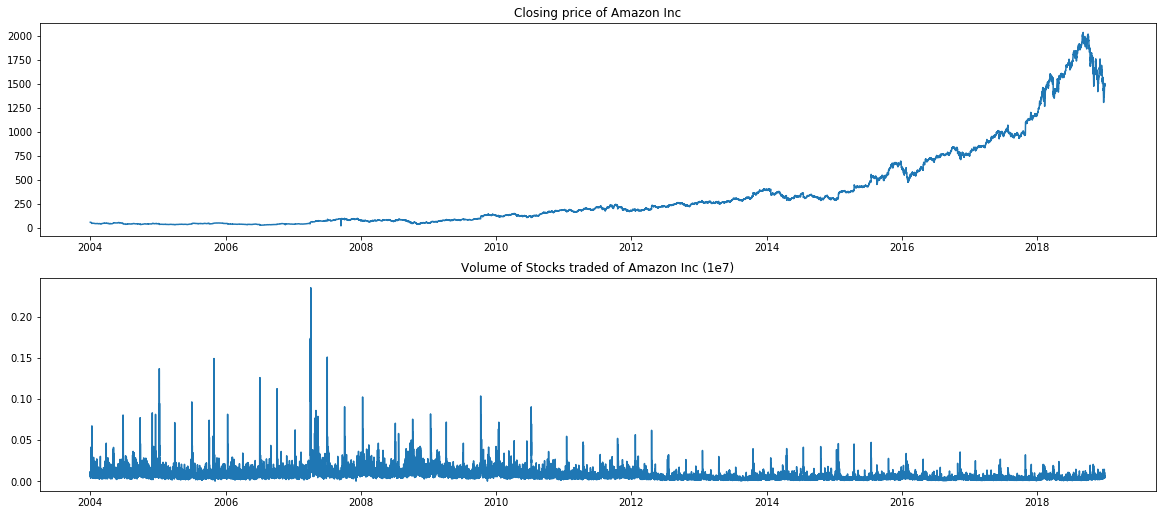

In [9]:
# pd.set_option('display.width', 500)
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.notebook_repr_html', True)
# pd.set_option('display.width', 1500)
# pd.set_option('display.max_columns', 100)
fig,ax=plt.subplots(2,1,figsize=(20,5))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.4, wspace=None, hspace=None)
date = np.linspace(2004, 2019, num = 26208)
ax[0].plot(date, amzn['CLOSE'])
ax[0].set_title('Closing price of Amazon Inc')

ax[1].plot(date, amzn['VOLUME']/1000000)
ax[1].set_title('Volume of Stocks traded of Amazon Inc (1e7)')


plt.show()